# Técnicas de reducción de la dimensionalidad

## 1. Librerias y Datos

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')
data.head()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party,stays_nights
0,0,3.018292,17.0,20,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,4
1,0,6.724848,17.0,17,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,7.729769,8.0,16,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,7
3,1,7.779122,30.0,23,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,4
4,0,5.366444,33.0,18,3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,3


Separamos la variable objetivo (is_canceled) de las demás.

In [3]:
x = data.iloc[:,1:26].values
y = data.iloc[:,0].values

## 2. Aplicación de PCA

### Normalizamos

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)

### Autovectores y Autovalores

In [5]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)



Eigenvectors 
[[-1.35491974e-02 -1.67249381e-04  9.01560342e-03  6.92958527e-03
   9.04740957e-02 -2.46071282e-02 -1.01154738e-02  3.74315865e-03
   7.84355666e-03  3.65962918e-02  6.97639196e-02 -3.03964222e-02
   7.69233846e-02 -1.82539920e-02  8.06182497e-03 -3.19311144e-02
  -3.37188833e-01  1.18129958e-01 -6.92660439e-02 -1.25386671e-01
  -2.87007408e-01 -3.07236558e-01  7.47583194e-01 -3.03220817e-01
   2.21647202e-02]
 [-6.78406821e-01 -7.06235081e-01 -6.00047855e-02 -8.82676528e-02
   6.33315265e-02  1.33898019e-01  1.20231257e-03 -1.97097372e-02
  -2.32689218e-02 -1.74386607e-02  2.49988374e-02  4.00257619e-02
   1.30528367e-02  2.43850274e-03  9.83753737e-04  1.32083554e-02
   8.70953730e-03 -4.13971166e-03  4.95796507e-02  2.95966018e-02
   3.46738545e-03  9.01912368e-03  1.06586412e-02  1.41930641e-02
  -3.89182188e-03]
 [-2.44082239e-02  6.47349941e-02  1.34133107e-02  4.40739874e-03
  -3.75563992e-02  2.11508143e-02  2.52264894e-02  6.99462733e-03
  -1.19379109e-02  2.682

In [6]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
2.0520582523245965
1.7451044574783683
1.6041688561457634
1.4153448265061164
1.3382714769048776
1.1878046973580723
1.0997044293156664
1.0494280285119377
1.031342187640272
1.0088059834641088
0.9993337398807529
0.9908529522178563
0.9786200116782309
0.9702368141874586
0.9417386966910903
0.9174036354238253
0.8645460231903002
0.8301611820872025
0.8098312029451681
0.7875590607494666
0.6573171206976021
0.6386503129561165
0.5533305403387303
0.5303193594929312
0.000566401838479296


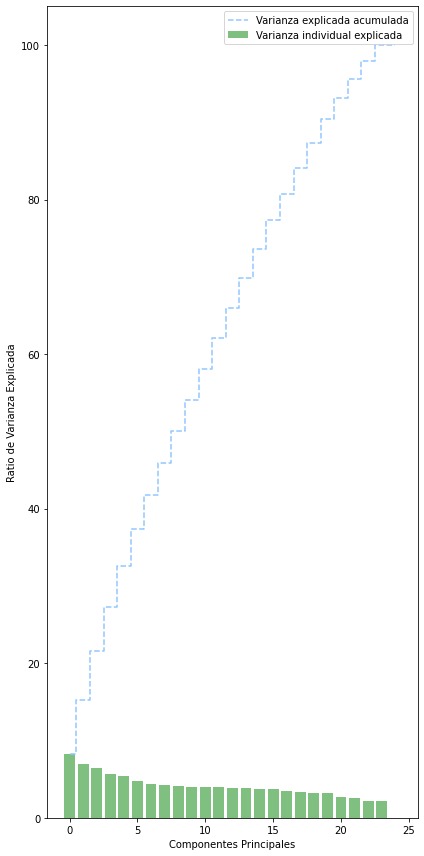

In [7]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 12))

    plt.bar(range(25), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(25), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()



Podemos ver que con las 18 primeras componentes, ya tenemos más del 80% de la información.

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18',])

principalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18
0,184.498413,15.596253,-1.026844,6.421267,-4.545432,-0.026959,-0.202183,0.131349,-0.190743,0.165106,-0.076175,0.051528,0.259369,-0.021306,-0.451999,-0.294981,-0.012346,0.018566
1,-2.457076,10.431470,-1.838627,0.068417,-1.462330,-0.176329,0.218437,-0.473102,-0.029248,0.173078,-0.801536,-0.189457,0.685258,0.184482,0.381071,0.064476,-0.181705,-0.036670
2,-2.740955,19.590949,-1.981517,10.406486,-0.387019,-0.199475,0.255685,-0.434873,-0.089053,0.231171,-0.636900,-0.121015,0.040296,-0.258992,-0.175431,-0.090094,-0.148572,-0.038430
3,-1.954861,-3.411424,-8.025109,17.769596,-0.369096,-0.150446,0.264576,-0.526711,-0.202154,0.185775,0.299497,-0.024244,0.083746,0.005400,-0.107484,-0.238924,-0.002060,-0.036716
4,-1.973485,-6.005784,-1.410386,-7.392257,-2.905913,-0.219632,-0.031958,-0.160631,1.636506,1.315840,0.625545,-0.178318,0.099085,-0.106188,-0.074488,-0.213652,-0.017493,-0.049751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.641944,19.466209,-5.264109,-2.125700,0.385730,-0.229771,0.264790,-0.487285,-0.225726,0.175734,0.457679,-0.099233,0.307468,0.077024,-0.572179,0.553456,-0.019367,0.003549
9996,-2.387255,-0.336437,8.352920,-8.455090,5.582606,-0.131585,-0.930965,1.339168,0.557162,0.041314,0.393308,1.786377,-0.017132,-0.110162,0.144045,0.029668,-0.075625,-0.019285
9997,-1.568567,-9.775366,-14.735277,1.224626,-7.456691,-0.174958,0.264265,-0.545198,-0.169247,0.222197,0.120567,-0.014201,-0.463618,0.786963,-0.184502,-0.140912,0.075598,-0.036074
9998,-2.842349,13.287160,12.403810,-6.334793,-3.254425,-0.147466,-0.295988,0.338597,-0.166203,-0.002108,-0.764619,-0.245096,0.608256,0.159945,0.454715,0.083332,-0.201466,-0.047764


In [9]:
finalDf = pd.concat([principalDf, pd.DataFrame(y)], axis=1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,0
0,184.498413,15.596253,-1.026844,6.421267,-4.545432,-0.026959,-0.202183,0.131349,-0.190743,0.165106,-0.076175,0.051528,0.259369,-0.021306,-0.451999,-0.294981,-0.012346,0.018566,0
1,-2.457076,10.431470,-1.838627,0.068417,-1.462330,-0.176329,0.218437,-0.473102,-0.029248,0.173078,-0.801536,-0.189457,0.685258,0.184482,0.381071,0.064476,-0.181705,-0.036670,0
2,-2.740955,19.590949,-1.981517,10.406486,-0.387019,-0.199475,0.255685,-0.434873,-0.089053,0.231171,-0.636900,-0.121015,0.040296,-0.258992,-0.175431,-0.090094,-0.148572,-0.038430,0
3,-1.954861,-3.411424,-8.025109,17.769596,-0.369096,-0.150446,0.264576,-0.526711,-0.202154,0.185775,0.299497,-0.024244,0.083746,0.005400,-0.107484,-0.238924,-0.002060,-0.036716,1
4,-1.973485,-6.005784,-1.410386,-7.392257,-2.905913,-0.219632,-0.031958,-0.160631,1.636506,1.315840,0.625545,-0.178318,0.099085,-0.106188,-0.074488,-0.213652,-0.017493,-0.049751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.641944,19.466209,-5.264109,-2.125700,0.385730,-0.229771,0.264790,-0.487285,-0.225726,0.175734,0.457679,-0.099233,0.307468,0.077024,-0.572179,0.553456,-0.019367,0.003549,0
9996,-2.387255,-0.336437,8.352920,-8.455090,5.582606,-0.131585,-0.930965,1.339168,0.557162,0.041314,0.393308,1.786377,-0.017132,-0.110162,0.144045,0.029668,-0.075625,-0.019285,1
9997,-1.568567,-9.775366,-14.735277,1.224626,-7.456691,-0.174958,0.264265,-0.545198,-0.169247,0.222197,0.120567,-0.014201,-0.463618,0.786963,-0.184502,-0.140912,0.075598,-0.036074,1
9998,-2.842349,13.287160,12.403810,-6.334793,-3.254425,-0.147466,-0.295988,0.338597,-0.166203,-0.002108,-0.764619,-0.245096,0.608256,0.159945,0.454715,0.083332,-0.201466,-0.047764,0


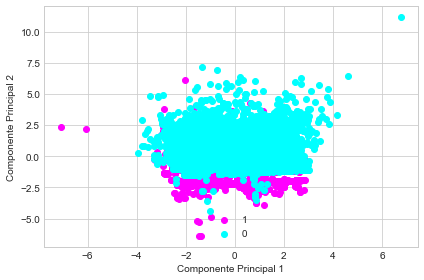

In [10]:
#PINTAMOS EN DOS DIMENSIONES CON LAS DOS PRIMERAS COMPONENTES PRINCIPALES

#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(25,1),
                      eig_pairs[1][1].reshape(25,1)))

Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip((1, 0), ('magenta', 'cyan')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


## 3. Aplicación de T-SNE

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.172s...
[t-SNE] Computed neighbors for 10000 samples in 0.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.436040
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.354691
[t-SNE] KL divergence after 300 iterations: 3.861047


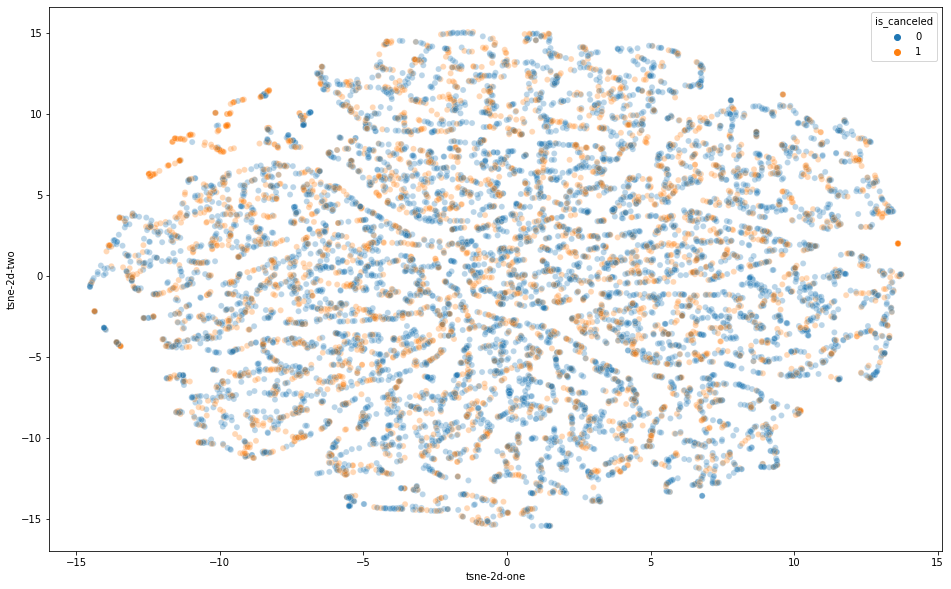

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.175s...
[t-SNE] Computed neighbors for 10000 samples in 0.996s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.127298
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.957932
[t-SNE] KL divergence after 300 iterations: 3.213771


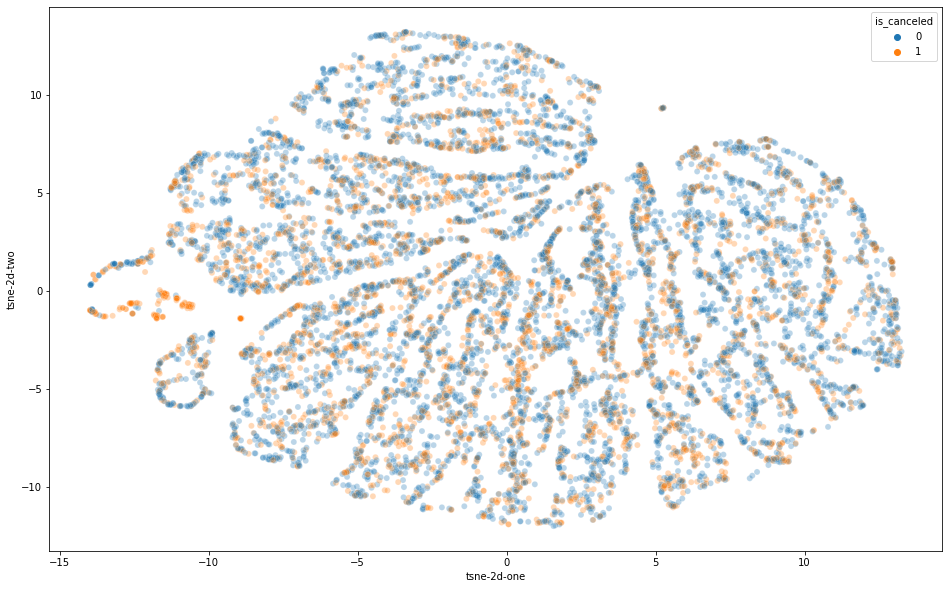

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.166s...
[t-SNE] Computed neighbors for 10000 samples in 1.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.460575
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.219849
[t-SNE] KL divergence after 300 iterations: 2.950994


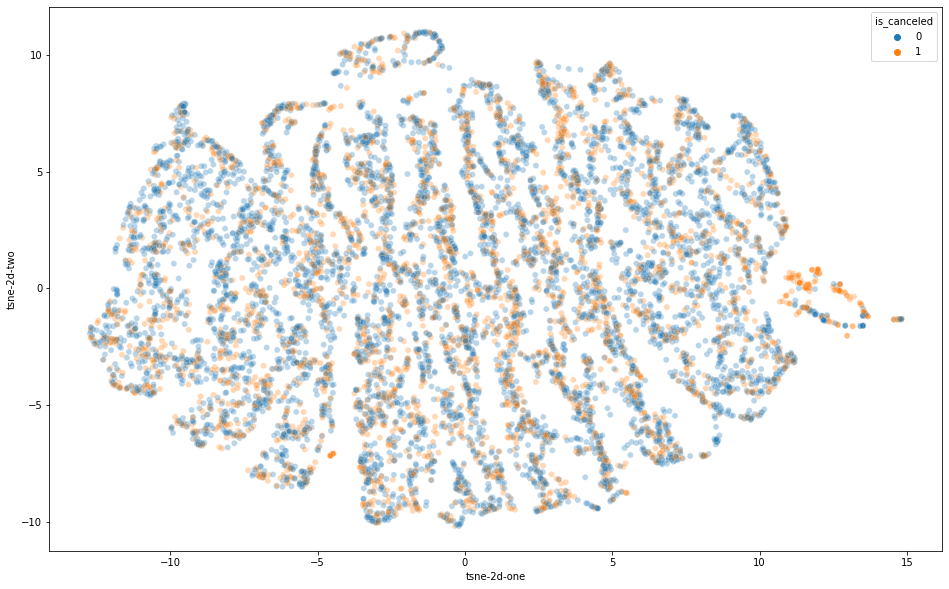

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.169s...
[t-SNE] Computed neighbors for 10000 samples in 1.460s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.687347
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.146988
[t-SNE] KL divergence after 300 iterations: 2.757745


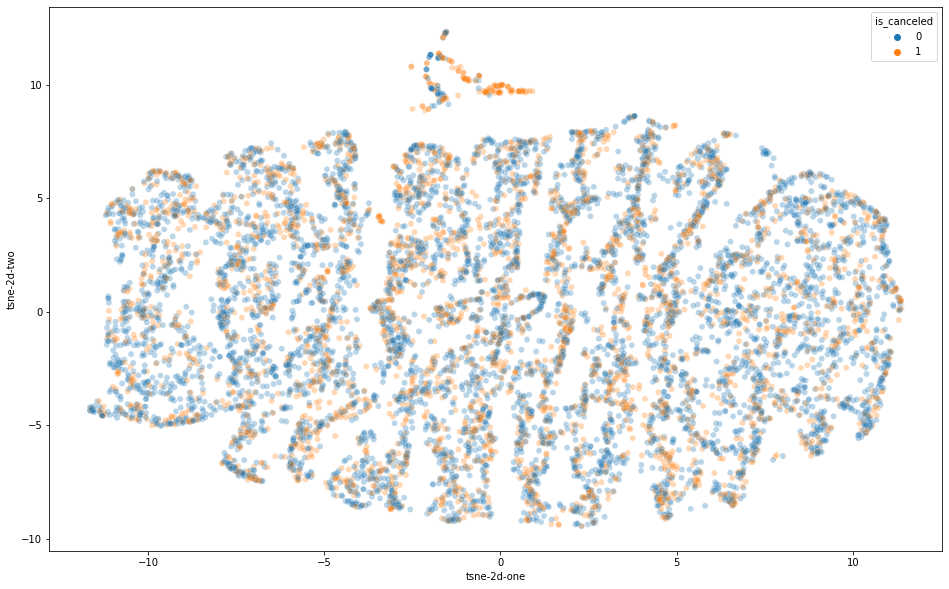

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.177s...
[t-SNE] Computed neighbors for 10000 samples in 1.397s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.779896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.301193
[t-SNE] KL divergence after 300 iterations: 2.663830


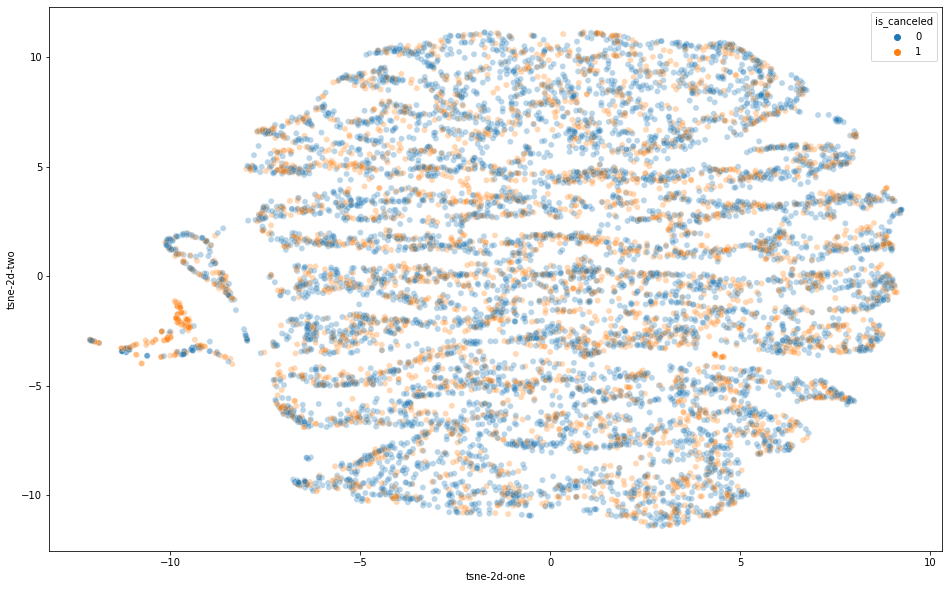

In [35]:
import seaborn as sns

data_subset = x
perplexity=[5,15,25,35,40]
for i in perplexity:
    tsne = TSNE(n_components=2, verbose=1, perplexity=i, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    
    data['tsne-2d-one'] = tsne_results[:,0]
    data['tsne-2d-two'] = tsne_results[:,1]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="is_canceled",
        data=data,
        legend="full",
        alpha=0.3
    )
    plt.show()